In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def apply_processing_to_img_folder (processing_function, source_path, destination_path, modification_string, inclusion_string="", **kwargs):
    files = os.listdir(source_path)
    
    # Select files to process.
    nifti_files = [file for file in files if (file.endswith('.nii.gz')) & (inclusion_string in file)]

    for file in nifti_files:
        file_path = os.path.join(source_path, file)
        nii_img = nib.load(file_path)
        nii_data = nii_img.get_fdata()
        new_img_name = os.path.splitext(os.path.splitext(file)[0])[0] + "_" + modification_string + ".nii.gz"
    
        # Apply processing_function to the array, then save it as a nifti file.
        save_array_to_nifti1(processing_function(nii_data, **kwargs), nii_img, destination_path, new_img_name)
        print("Processed image ", file)

In [3]:
def save_array_to_nifti1(array, original_img, destination_path, output_name):
    # Transform the array to a nifti image which requires the affine of the original image.
    processed_img = nib.Nifti1Image(array, original_img.affine)
    
    nib.save(processed_img, os.path.join(destination_path, output_name))

In [1]:
def uniform_discretization (array, num_bins, quantile_of_max=1.0):
    # Set the max intensity value of the discretization. This approach sets a given quantile as the maximum, e.g. if the
    # maximum is above the quantile (say 99.9%) it is set to that value. This avoids intensities with high values but
    # very low prevalence in the data dragging the max to the right.
    max_pxl_value = np.quantile(array, quantile_of_max)

    # Set the min intensity value. Usually 0, but can be negative for z-normalized data.
    min_pxl_value = np.min(array)
    
    # Bin edges of the discretized image. The value of the pixels will be set at the middle of the bins.
    bin_edges = np.linspace(min_pxl_value, max_pxl_value, num_bins)
    bin_step = bin_edges[1] - bin_edges[0]

    # Compute the bin membership of each pixel using digitize, map it to the bin middle and shift the value respecting the
    # minimum pixel value.
    quantized_array = np.digitize(array, bin_edges) * bin_step - (0.5 * bin_step) + min_pxl_value

    # Make sure returned type is the same as input.
    return quantized_array.astype("float32")

In [74]:
apply_processing_to_img_folder (uniform_discretization, "D:\\pythonscripts_ETIS", "D:\\pythonscripts_ETIS\\Discretized_imgs", "Discretized", inclusion_string="Normalized", num_bins=500, quantile_of_max=0.999)

Processed image  2018-104_01-10087-D0MR_12_SWI_Images_swi3d1r_Normalized.nii.gz
Processed image  2018-104_01-10113-D0MR_9_Ax_T2_GRE_Normalized.nii.gz
Processed image  2018-104_01-10114-D0MR_7_Ax_3D_SWAN+CARTO_Normalized.nii.gz
Processed image  2018-104_01-10116-D0MR_7_AXIAL_T2_EG_fl2d1_Normalized.nii.gz
Processed image  2018-104_01-10117-D0MR_7_Ax_T2_GRE_Normalized.nii.gz
Processed image  2018-104_01-10118-D0MR_12_SWI_Images_swi3d1r_Normalized.nii.gz


In [47]:
def clean_filenames (folder_path, inclusion_string=""):
    files = os.listdir(folder_path)
    
    # Select files to process.
    nifti_files = [file for file in files if (file.endswith('.nii.gz')) & (inclusion_string in file)]

    # Remove duplicate inclusion string.
    for file in nifti_files:
        new_filename = file.replace("_" + inclusion_string, "")
        old_path = os.path.join(folder_path, file)
        new_path = os.path.join(folder_path, new_filename)
        try:
            os.remove(new_path)
        finally:
            os.rename(old_path, new_path)
        print(f"Renamed: {file} as {new_filename}")

In [75]:
clean_filenames("D:\\pythonscripts_ETIS\\Discretized_imgs", inclusion_string="Normalized")

Renamed: 2018-104_01-10087-D0MR_12_SWI_Images_swi3d1r_Normalized_Discretized.nii.gz as 2018-104_01-10087-D0MR_12_SWI_Images_swi3d1r_Discretized.nii.gz
Renamed: 2018-104_01-10113-D0MR_9_Ax_T2_GRE_Normalized_Discretized.nii.gz as 2018-104_01-10113-D0MR_9_Ax_T2_GRE_Discretized.nii.gz
Renamed: 2018-104_01-10114-D0MR_7_Ax_3D_SWAN+CARTO_Normalized_Discretized.nii.gz as 2018-104_01-10114-D0MR_7_Ax_3D_SWAN+CARTO_Discretized.nii.gz
Renamed: 2018-104_01-10116-D0MR_7_AXIAL_T2_EG_fl2d1_Normalized_Discretized.nii.gz as 2018-104_01-10116-D0MR_7_AXIAL_T2_EG_fl2d1_Discretized.nii.gz
Renamed: 2018-104_01-10117-D0MR_7_Ax_T2_GRE_Normalized_Discretized.nii.gz as 2018-104_01-10117-D0MR_7_Ax_T2_GRE_Discretized.nii.gz
Renamed: 2018-104_01-10118-D0MR_12_SWI_Images_swi3d1r_Normalized_Discretized.nii.gz as 2018-104_01-10118-D0MR_12_SWI_Images_swi3d1r_Discretized.nii.gz


In [60]:
nii_img_norm = nib.load("D:\\pythonscripts_ETIS\\2018-104_01-10087-D0MR_12_SWI_Images_swi3d1r_Normalized.nii.gz")
nii_data_norm = nii_img_norm.get_fdata()

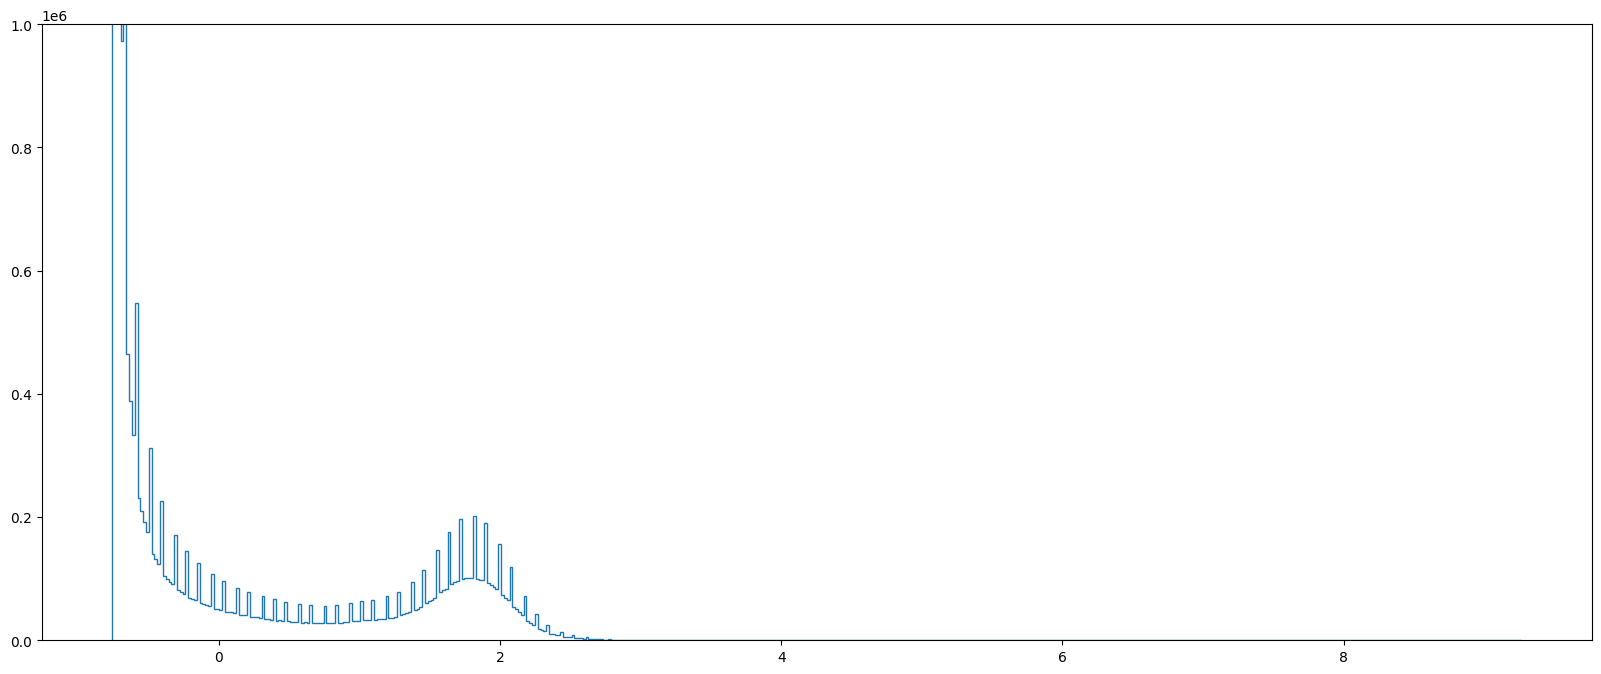

In [61]:
fig, ax = plt.subplots(figsize=(20, 8))
counts, bins = np.histogram(nii_data_norm.flatten(), bins=500)

plt.hist(bins[:-1], bins, weights=counts, histtype="step")
ax.set_ylim(0,1000000)
plt.show()

In [76]:
nii_img_disc = nib.load("D:\\pythonscripts_ETIS\\Discretized_imgs\\2018-104_01-10087-D0MR_12_SWI_Images_swi3d1r_Discretized.nii.gz")
nii_data_disc = nii_img_disc.get_fdata()

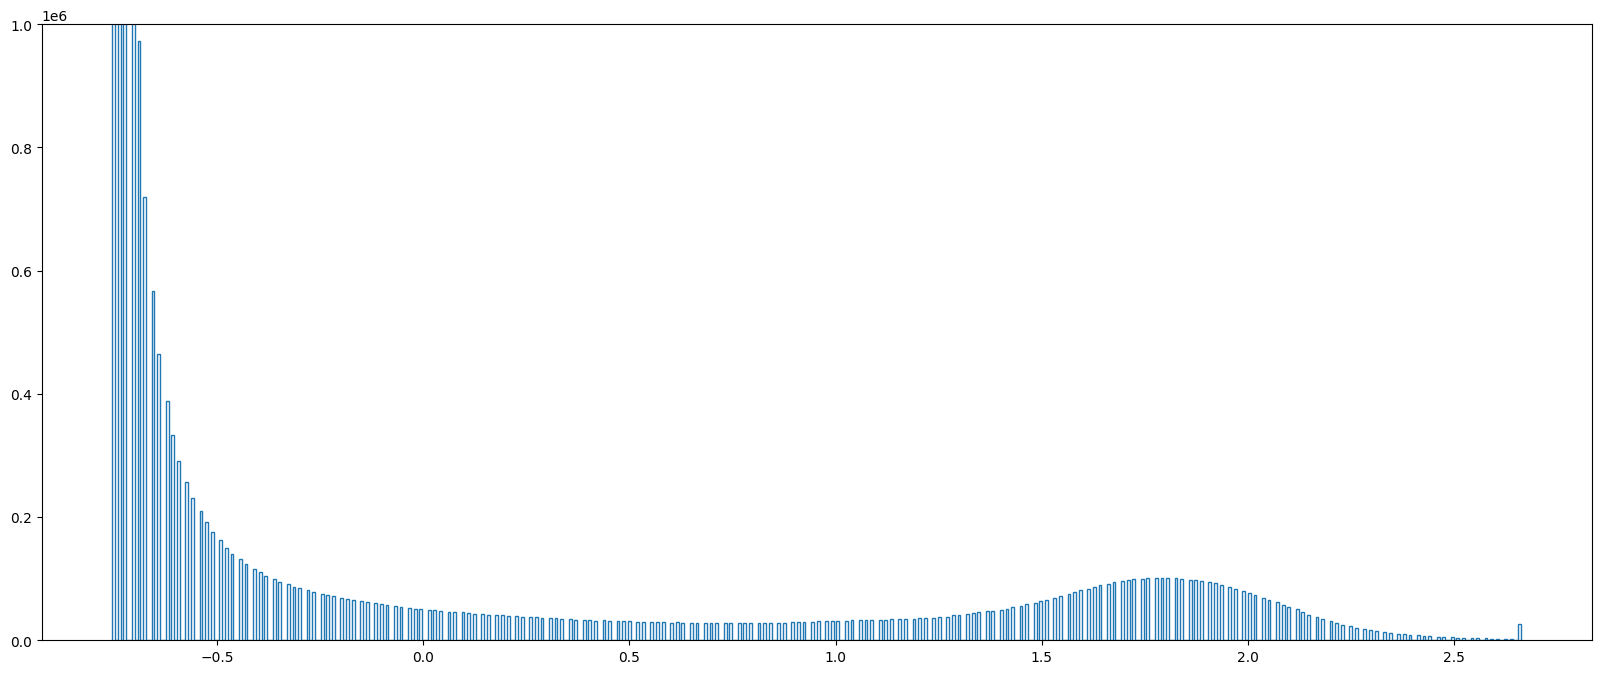

In [77]:
fig, ax = plt.subplots(figsize=(20, 8))
counts, bins = np.histogram(nii_data_disc.flatten(), bins=500)

plt.hist(bins[:-1], bins, weights=counts, histtype="step")
ax.set_ylim(0,1000000)
plt.show()

In [6]:
def compute_img_histograms (source_path, histogram_bins, files_to_process=None):
    files = os.listdir(source_path)

    # There is a parameter used to specify only up to n-files to perform the computation on.
    if files_to_process is None:
        nifti_files = [file for file in files if file.endswith('.nii.gz')]
    else:
        nifti_files = [file for file in files if file.endswith('.nii.gz')][:files_to_process]

    histogram_list = []

    for file in nifti_files:
        file_path = os.path.join(source_path, file)
        nii_img = nib.load(file_path)
        nii_data = nii_img.get_fdata()
        histogram_list.append(np.histogram(nii_data.flatten(), bins=histogram_bins))
    
    return histogram_list

In [78]:
hist_list_disc = compute_img_histograms("D:\\pythonscripts_ETIS\\Discretized_imgs", 500)

In [52]:
hist_list_norm = compute_img_histograms("D:\\pythonscripts_ETIS", 500)

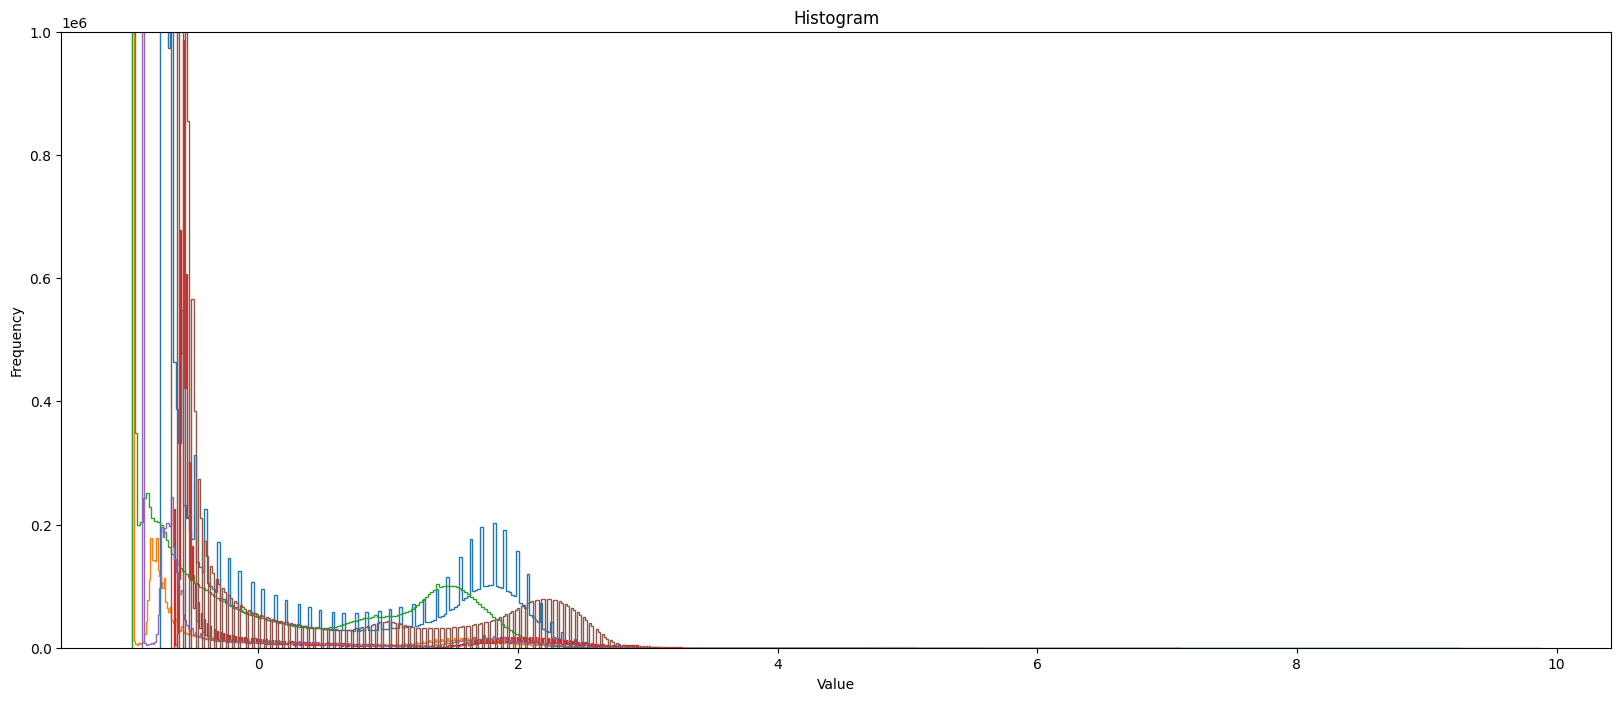

In [53]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list_norm):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_ylim(0,1000000)

plt.show()

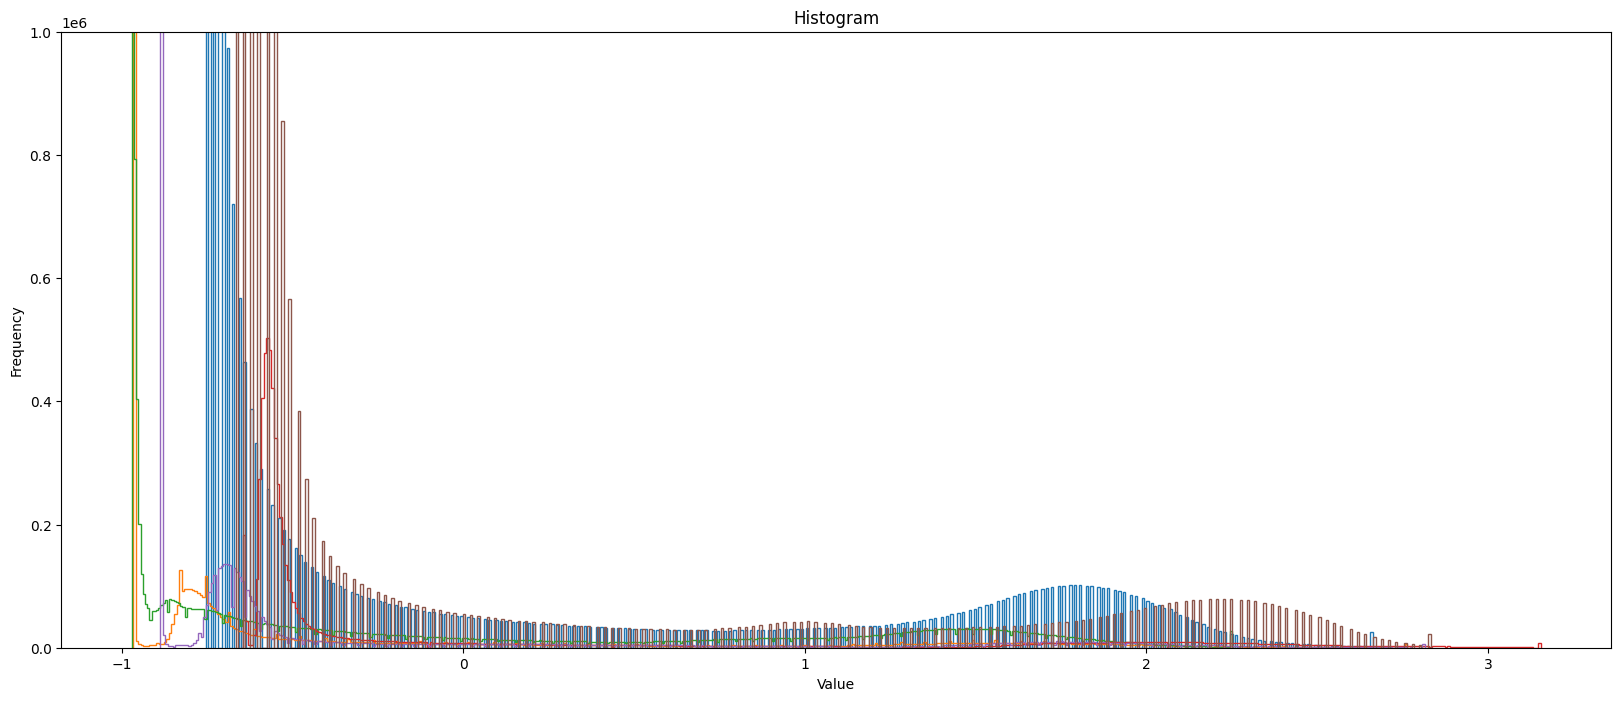

In [79]:
fig, ax = plt.subplots(figsize=(20, 8))

for i, hist_data in enumerate(hist_list_disc):
    counts, bins = hist_data
    
    plt.hist(bins[:-1], bins, weights=counts, histtype="step")
    
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_ylim(0,1000000)

plt.show()